In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
from skimage import io, transform
from skimage.transform import resize
import joblib
import cv2
import os

In [14]:
path = r"Dataset"
model_folder = "model"
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [15]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X= np.load(X_file)
    Y= np.load(X_file)
    print("X and Y arrays loaded successfully")
else:
    X = []
    Y = []
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name + " " + root + "/" + directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root + "/" + directory[j])
            img_resized = resize(img_array, (64, 64, 3))
            X.append(img_resized.flatten())
            Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)


Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (1).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (10).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (11).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (12).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (13).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (14).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (15).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (2).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (3).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (4).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (5).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (6).jpg
Loading category: []
glioma_tumor Dataset\Dataset\glioma_tumor/gg (7).jpg
Loading category: []
glioma_tumo

In [9]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X= np.load(X_file)
    Y= np.load(X_file)
    print("X and Y arrays loaded successfully")
else:
    X = []
    Y = []
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name + " " + root + "/" + directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root + "/" + directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                X.append(img_resized.flatten())
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)


X and Y arrays loaded successfully


In [16]:
df = pd.DataFrame(X)
df['Y'] = Y
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Y
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
7,1.387317e-04,1.387317e-04,1.387317e-04,5.491584e-04,5.491584e-04,5.491584e-04,6.189098e-04,6.189098e-04,6.189098e-04,6.190824e-04,...,1.399778e-02,1.399778e-02,1.399778e-02,0.009461,0.009461,0.009461,8.462638e-03,8.462638e-03,8.462638e-03,0
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0


<Axes: xlabel='Y', ylabel='count'>

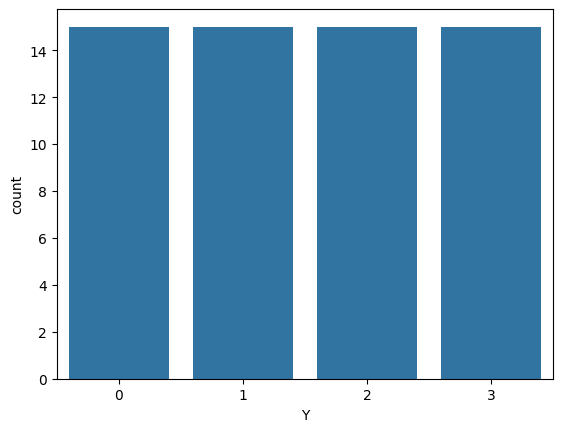

In [17]:
sns.countplot(x = df['Y'])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', C=1.0, gamma='scale', random_state=42,)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [20]:
y_pred

array([3, 0, 3, 1, 2, 3, 1, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc)


0.7777777777777778


In [22]:
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.20      0.33         5
           3       0.40      1.00      0.57         2

    accuracy                           0.78        18
   macro avg       0.80      0.80      0.70        18
weighted avg       0.89      0.78      0.74        18



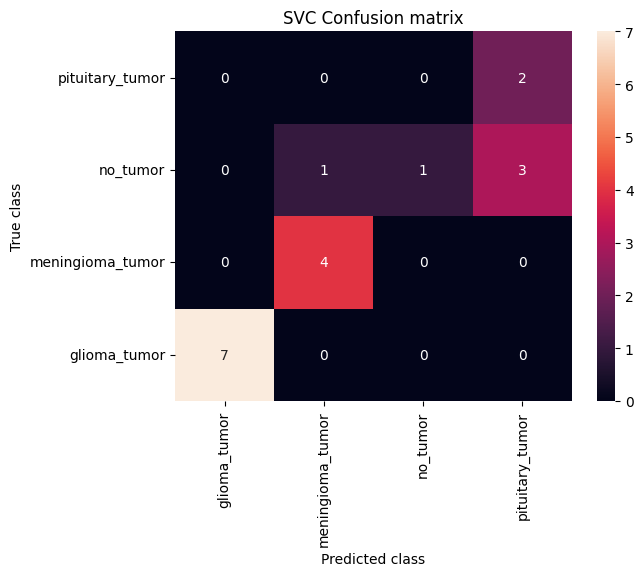

In [23]:



import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, xticklabels = categories, yticklabels = categories, annot = True)
ax.set_ylim([0,len(categories)])
plt.title("SVC Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()